# RBD:ACE2 mutations with outliers

## Format the data appropriately for arsenic

In [1]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [2]:
def compute_binding_ddgs(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5

In [3]:
title_pairs = [["N439K"], ["N501Y"], ["Y453F"], ["Q493A"], ["T500I"], ["V350F"], ["V433Q"], ["G431A"], ["I410S"], ["N487R"], ["N501D"], ["Y489Q"], ["E484K"], ["K417N"]]
dir_num = 15
subdirs = [30, 16, 13, 14, 15, 17, 18, 19, 20, 33, 34, 26, 31, 32]
# to_plot = ['# Calculated block', '# Mutant1, Mutant2, calc_DDG, calc_dDDG(BAR), calc_dDDG(additional)']
to_plot = []
for i, subdir in enumerate(subdirs):
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/ddgs.pickle", "rb") as f:
        ddgs = pickle.load(f)
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/dgs_phase.pickle", "rb") as f:
        dgs_phase = pickle.load(f)
        
        # Compute binding ddgs from BAR
        binding_ddgs_forward = []
#         binding_ddgs_backward = []
        for j in range(len(dgs_phase)):
            binding_ddgs_forward.append(compute_binding_ddgs(dgs_phase[subdir][j]['apo'][1], dgs_phase[subdir][j]['complex'][1]))
#             binding_ddgs_backward.append(compute_binding_ddgs(dgs_phase[subdir+1][j]['apo'][1], dgs_phase[subdir+1][j]['complex'][1]))

    to_plot.append([title_pairs[i][0][:-1], title_pairs[i][0][-1] + title_pairs[i][0][1:4], np.mean(ddgs[subdir])*KT_KCALMOL, np.mean(binding_ddgs_forward)*KT_KCALMOL, abs(np.mean(ddgs[subdir])*KT_KCALMOL - np.percentile(ddgs[subdir], 2.5)*KT_KCALMOL)])
#     to_plot.append([title_pairs[i][1][:-1], title_pairs[i][1][-1] + title_pairs[i][1][1:3], np.mean(ddgs[subdir+1])*KT_KCALMOL, np.mean(binding_ddgs_backward)*KT_KCALMOL, abs(np.mean(ddgs[subdir+1])*KT_KCALMOL - np.percentile(ddgs[subdir+1], 2.5)*KT_KCALMOL)]) # take the negative of these so they match the forward transform values
        
        
        

In [4]:
to_plot

[['N439',
  'K439',
  -0.08246009269737735,
  0.3039936928161879,
  0.5296867591413762],
 ['N501', 'Y501', 4.278652939518673, 0.5623303998000092, 0.8197108988902952],
 ['Y453',
  'F453',
  0.016221214336817405,
  0.07095216681268039,
  0.16726706550421838],
 ['Q493',
  'A493',
  0.6016017865436382,
  0.14855227343476793,
  0.41078091967301505],
 ['T500', 'I500', 3.394569899074289, 0.1462170981341006, 0.2836054132071184],
 ['V350', 'F350', 2.382543723445278, 0.4510763390791423, 1.4523229246026774],
 ['V433',
  'Q433',
  0.12464471715671985,
  0.13113206962895615,
  0.3074141578379441],
 ['G431',
  'A431',
  -0.39921460099784467,
  0.09286187509366947,
  0.25739228187882124],
 ['I410',
  'S410',
  -0.6146524885879511,
  0.14065111631344415,
  0.27239062966110084],
 ['N487', 'R487', 2.782722120574718, 0.27586859815474446, 0.7122965836896915],
 ['N501', 'D501', 7.79304894759099, 0.4530959172885375, 1.3399323056742718],
 ['Y489', 'Q489', 3.174023122750573, 0.18662803018836197, 0.36937065121

In [5]:
d = {'WT': 0, 'K439': -0.06, 'Y501': -0.33, 'F453': -0.35, 
     'A493': -0.18, 'I500': 3.18, 'F350': 6.69, "Q433": 6.63,
      "A431": 6.63, "S410": 6.63, "R487": 3.18, "D501": 3.34, 
     "Q489": 3.04, "K484": -0.08, "N417": 0.62}

In [11]:
# experiment = ['# Experiment block', '# Mutant, expt_DDG, expt_dDDG']
experiment = []
for k in d.keys():
    if k == 'WT':
        experiment.append(['N439', d['WT'], 0])
        experiment.append(['N501', d['WT'], 0])
        experiment.append(['Y453', d['WT'], 0])
        experiment.append(['Q493', d['WT'], 0])
        experiment.append(['T500', d['WT'], 0])
        experiment.append(['V350', d['WT'], 0]) 
        experiment.append(['V433', d['WT'], 0])
        experiment.append(['G431', d['WT'], 0])
        experiment.append(['I410', d['WT'], 0])
        experiment.append(['N487', d['WT'], 0])
        experiment.append(['N501', d['WT'], 0])
        experiment.append(['Y489', d['WT'], 0])
        experiment.append(['E484', d['WT'], 0])
        experiment.append(['K417', d['WT'], 0])
    else:
        experiment.append([k, d[k], 0])

In [12]:
experiment

[['N439', 0, 0],
 ['N501', 0, 0],
 ['Y453', 0, 0],
 ['Q493', 0, 0],
 ['T500', 0, 0],
 ['V350', 0, 0],
 ['V433', 0, 0],
 ['G431', 0, 0],
 ['I410', 0, 0],
 ['N487', 0, 0],
 ['N501', 0, 0],
 ['Y489', 0, 0],
 ['E484', 0, 0],
 ['K417', 0, 0],
 ['K439', -0.06, 0],
 ['Y501', -0.33, 0],
 ['F453', -0.35, 0],
 ['A493', -0.18, 0],
 ['I500', 3.18, 0],
 ['F350', 6.69, 0],
 ['Q433', 6.63, 0],
 ['A431', 6.63, 0],
 ['S410', 6.63, 0],
 ['R487', 3.18, 0],
 ['D501', 3.34, 0],
 ['Q489', 3.04, 0],
 ['K484', -0.08, 0],
 ['N417', 0.62, 0]]

In [13]:
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_20210402.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


## Make arsenic plot

In [9]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from arsenic import plotting, stats, wrangle

In [14]:
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/neq/15/arsenic_input_20210402.csv')

Graph is not connected enough to compute absolute values


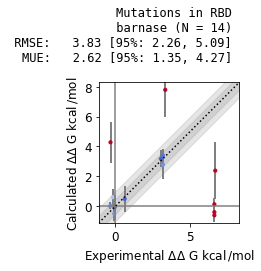

In [16]:
plotting.plot_DDGs(fe.graph,target_name='barnase', title='Mutations in RBD', units=r'$\mathrm{kcal\,/mol}$', filename='/data/chodera/zhangi/perses_benchmark/neq/15/arsenic_input_20210402.png')
# added dpi to savefig() in local version
# removed "/" in labels in local version

# RBD:ACE2 mutations without outliers

## Format the data appropriately for arsenic

In [17]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [18]:
def compute_binding_ddgs(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5

In [31]:
title_pairs = [["N439K"], ["Y453F"], ["Q493A"], ["T500I"], ["N487R"], ["Y489Q"], ["E484K"], ["K417N"]]
dir_num = 15
subdirs = [30, 13, 14, 15, 33, 26, 31, 32]
# to_plot = ['# Calculated block', '# Mutant1, Mutant2, calc_DDG, calc_dDDG(BAR), calc_dDDG(additional)']
to_plot = []
for i, subdir in enumerate(subdirs):
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/ddgs.pickle", "rb") as f:
        ddgs = pickle.load(f)
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/dgs_phase.pickle", "rb") as f:
        dgs_phase = pickle.load(f)
        
        # Compute binding ddgs from BAR
        binding_ddgs_forward = []
#         binding_ddgs_backward = []
        for j in range(len(dgs_phase)):
            binding_ddgs_forward.append(compute_binding_ddgs(dgs_phase[subdir][j]['apo'][1], dgs_phase[subdir][j]['complex'][1]))
#             binding_ddgs_backward.append(compute_binding_ddgs(dgs_phase[subdir+1][j]['apo'][1], dgs_phase[subdir+1][j]['complex'][1]))

    to_plot.append([title_pairs[i][0][:-1], title_pairs[i][0][-1] + title_pairs[i][0][1:4], np.mean(ddgs[subdir])*KT_KCALMOL, np.mean(binding_ddgs_forward)*KT_KCALMOL, abs(np.mean(ddgs[subdir])*KT_KCALMOL - np.percentile(ddgs[subdir], 2.5)*KT_KCALMOL)])
#     to_plot.append([title_pairs[i][1][:-1], title_pairs[i][1][-1] + title_pairs[i][1][1:3], np.mean(ddgs[subdir+1])*KT_KCALMOL, np.mean(binding_ddgs_backward)*KT_KCALMOL, abs(np.mean(ddgs[subdir+1])*KT_KCALMOL - np.percentile(ddgs[subdir+1], 2.5)*KT_KCALMOL)]) # take the negative of these so they match the forward transform values
        
        
        

In [32]:
to_plot

[['N439',
  'K439',
  -0.08246009269737735,
  0.3039936928161879,
  0.5296867591413762],
 ['Y453',
  'F453',
  0.016221214336817405,
  0.07095216681268039,
  0.16726706550421838],
 ['Q493',
  'A493',
  0.6016017865436382,
  0.14855227343476793,
  0.41078091967301505],
 ['T500', 'I500', 3.394569899074289, 0.1462170981341006, 0.2836054132071184],
 ['N487', 'R487', 2.782722120574718, 0.27586859815474446, 0.7122965836896915],
 ['Y489', 'Q489', 3.174023122750573, 0.18662803018836197, 0.36937065121980694],
 ['E484',
  'K484',
  -0.5047785640875477,
  0.16617753884506678,
  0.30307010074253316],
 ['K417', 'N417', 0.4846476966897347, 0.24848803608530268, 0.6131470936392587]]

In [34]:
d = {'WT': 0, 'K439': -0.06, 'F453': -0.35, 
     'A493': -0.18, 'I500': 3.18, "R487": 3.18, 
     "Q489": 3.04, "K484": -0.08, "N417": 0.62}

In [35]:
# experiment = ['# Experiment block', '# Mutant, expt_DDG, expt_dDDG']
experiment = []
for k in d.keys():
    if k == 'WT':
        experiment.append(['N439', d['WT'], 0])
        experiment.append(['Y453', d['WT'], 0])
        experiment.append(['Q493', d['WT'], 0])
        experiment.append(['T500', d['WT'], 0])
        experiment.append(['N487', d['WT'], 0])
        experiment.append(['Y489', d['WT'], 0])
        experiment.append(['E484', d['WT'], 0])
        experiment.append(['K417', d['WT'], 0])
    else:
        experiment.append([k, d[k], 0])

In [36]:
experiment

[['N439', 0, 0],
 ['Y453', 0, 0],
 ['Q493', 0, 0],
 ['T500', 0, 0],
 ['N487', 0, 0],
 ['Y489', 0, 0],
 ['E484', 0, 0],
 ['K417', 0, 0],
 ['K439', -0.06, 0],
 ['F453', -0.35, 0],
 ['A493', -0.18, 0],
 ['I500', 3.18, 0],
 ['R487', 3.18, 0],
 ['Q489', 3.04, 0],
 ['K484', -0.08, 0],
 ['N417', 0.62, 0]]

In [37]:
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_20210402_nooutliers.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


## Make arsenic plot

In [26]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from arsenic import plotting, stats, wrangle

In [38]:
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/neq/15/arsenic_input_20210402_nooutliers.csv')

Graph is not connected enough to compute absolute values


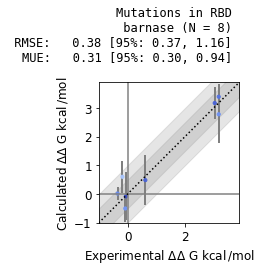

In [39]:
plotting.plot_DDGs(fe.graph,target_name='barnase', title='Mutations in RBD', units=r'$\mathrm{kcal\,/mol}$', filename='/data/chodera/zhangi/perses_benchmark/neq/15/arsenic_input_20210402_nooutliers.png')
# added dpi to savefig() in local version
# removed "/" in labels in local version

# RBD:ACE2 mutations without stabiliity outliers, including N501 outliers

## Format the data appropriately for arsenic

In [1]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [2]:
def compute_binding_ddgs(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5

In [3]:
title_pairs = [["N439K"], ["Y453F"], ["Q493A"], ["T500I"], ["N487R"], ["Y489Q"], ["E484K"], ["K417N"], ["N501Y"], ["N501D"]]
dir_num = 15
subdirs = [30, 13, 14, 15, 33, 26, 31, 32, 36, 34]
# to_plot = ['# Calculated block', '# Mutant1, Mutant2, calc_DDG, calc_dDDG(BAR), calc_dDDG(additional)']
to_plot = []
for i, subdir in enumerate(subdirs):
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/ddgs.pickle", "rb") as f:
        ddgs = pickle.load(f)
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/dgs_phase.pickle", "rb") as f:
        dgs_phase = pickle.load(f)
        
        # Compute binding ddgs from BAR
        binding_ddgs_forward = []
#         binding_ddgs_backward = []
        for j in range(len(dgs_phase)):
            binding_ddgs_forward.append(compute_binding_ddgs(dgs_phase[subdir][j]['apo'][1], dgs_phase[subdir][j]['complex'][1]))
#             binding_ddgs_backward.append(compute_binding_ddgs(dgs_phase[subdir+1][j]['apo'][1], dgs_phase[subdir+1][j]['complex'][1]))

    to_plot.append([title_pairs[i][0][:-1], title_pairs[i][0][-1] + title_pairs[i][0][1:4], np.mean(ddgs[subdir])*KT_KCALMOL, np.mean(binding_ddgs_forward)*KT_KCALMOL, abs(np.mean(ddgs[subdir])*KT_KCALMOL - np.percentile(ddgs[subdir], 2.5)*KT_KCALMOL)])
#     to_plot.append([title_pairs[i][1][:-1], title_pairs[i][1][-1] + title_pairs[i][1][1:3], np.mean(ddgs[subdir+1])*KT_KCALMOL, np.mean(binding_ddgs_backward)*KT_KCALMOL, abs(np.mean(ddgs[subdir+1])*KT_KCALMOL - np.percentile(ddgs[subdir+1], 2.5)*KT_KCALMOL)]) # take the negative of these so they match the forward transform values
        
        
        

In [4]:
to_plot

[['N439',
  'K439',
  -0.08246009269737735,
  0.3039936928161879,
  0.5296867591413762],
 ['Y453',
  'F453',
  0.016221214336817405,
  0.07095216681268039,
  0.16726706550421838],
 ['Q493',
  'A493',
  0.6016017865436382,
  0.14855227343476793,
  0.41078091967301505],
 ['T500', 'I500', 3.394569899074289, 0.1462170981341006, 0.2836054132071184],
 ['N487', 'R487', 2.782722120574718, 0.27586859815474446, 0.7122965836896915],
 ['Y489', 'Q489', 3.174023122750573, 0.18662803018836197, 0.36937065121980694],
 ['E484',
  'K484',
  -0.5047785640875477,
  0.16617753884506678,
  0.30307010074253316],
 ['K417', 'N417', 0.4846476966897347, 0.24848803608530268, 0.6131470936392587],
 ['N501', 'Y501', 6.393871030617074, 0.5323957330332186, 1.58162204319264],
 ['N501', 'D501', 7.79304894759099, 0.4530959172885375, 1.3399323056742718]]

In [5]:
d = {'WT': 0, 'K439': -0.06, 'F453': -0.35, 
     'A493': -0.18, 'I500': 3.18, "R487": 3.18, 
     "Q489": 3.04, "K484": -0.08, "N417": 0.62, 'Y501': -0.33, "D501": 3.34}

In [6]:
# experiment = ['# Experiment block', '# Mutant, expt_DDG, expt_dDDG']
experiment = []
for k in d.keys():
    if k == 'WT':
        experiment.append(['N439', d['WT'], 0])
        experiment.append(['Y453', d['WT'], 0])
        experiment.append(['Q493', d['WT'], 0])
        experiment.append(['T500', d['WT'], 0])
        experiment.append(['N487', d['WT'], 0])
        experiment.append(['Y489', d['WT'], 0])
        experiment.append(['E484', d['WT'], 0])
        experiment.append(['K417', d['WT'], 0])
        experiment.append(['N501', d['WT'], 0])
    else:
        experiment.append([k, d[k], 0])

In [7]:
experiment

[['N439', 0, 0],
 ['Y453', 0, 0],
 ['Q493', 0, 0],
 ['T500', 0, 0],
 ['N487', 0, 0],
 ['Y489', 0, 0],
 ['E484', 0, 0],
 ['K417', 0, 0],
 ['N501', 0, 0],
 ['K439', -0.06, 0],
 ['F453', -0.35, 0],
 ['A493', -0.18, 0],
 ['I500', 3.18, 0],
 ['R487', 3.18, 0],
 ['Q489', 3.04, 0],
 ['K484', -0.08, 0],
 ['N417', 0.62, 0],
 ['Y501', -0.33, 0],
 ['D501', 3.34, 0]]

In [9]:
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_20210429_N501_outliers_only.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


## Make arsenic plot

In [4]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from arsenic import plotting, stats, wrangle

In [5]:
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/neq/15/arsenic_input_20210429_N501_outliers_only.csv')

Graph is not connected enough to compute absolute values


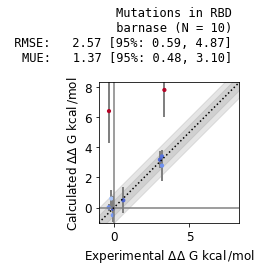

In [7]:
plotting.plot_DDGs(fe.graph,target_name='barnase', title='Mutations in RBD', units=r'$\mathrm{kcal\,/mol}$', filename='/data/chodera/zhangi/perses_benchmark/neq/15/arsenic_input_20210429_N501_outliers_only.png')
# added dpi to savefig() in local version
# removed "/" in labels in local version